/Users/akeow/opt/anaconda3/envs/VITAL_env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'proxy.sandia.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/akeow/opt/anaconda3/envs/VITAL_env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'proxy.sandia.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/akeow/opt/anaconda3/envs/VITAL_env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'proxy.sandia.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#t

Buoy lat:56.6765 degree
Buoy lon:-133.7325 degree
City lat:56.9653 degree
City lon:-134.1564 degree
City lat:0.9942320443863258 radian
City lon:-2.3414708926225205 radian
Buoy lat:0.9891915335065662 radian
Buoy lon:-2.3340724419233165 radian
Distance 25.623156076403998 miles
Mean of absolute flow 0.7266315291377095 m/s
Max of absolute flow 2.149 m/s


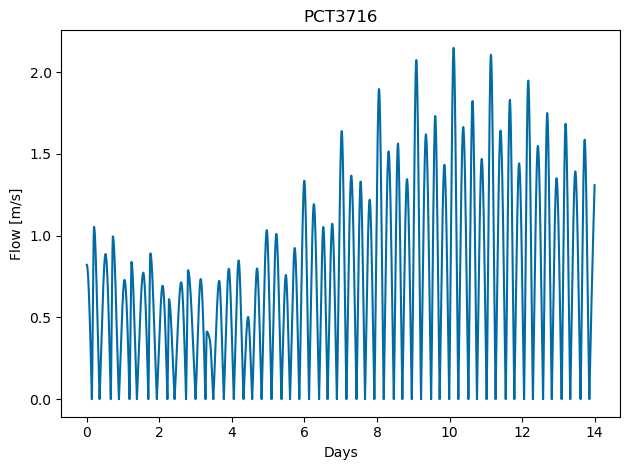

In [1]:
import numpy as np
import sys
import os
import pickle
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


# Define the path to the src directory manually
src_path = os.path.abspath('../../../src')
sys.path.insert(0, src_path)

from module_tidal import TidalData
from module_rotor import RotorData
from module_rotor_simulation import RotorSimulation
from module_vessel import VesselData
from module_lcoe import LCOE
from module_constraint_checker import ConstraintChecker
from module_battery_charging import BatteryCharging

from constUnitConvert import ConstantsUnitConversion
from constGlobal import ConstantsGlobal

CONVERT = ConstantsUnitConversion()
GLOBAL = ConstantsGlobal()

rotor_filename = "../../../data/Sitkana_rotor_data_blade_1.txt"
rotor_data = RotorData(rotor_filename)

station = "PCT3716"  # Site 2
startdate = 20200201  # yyyyMMdd
rangeHr = 2 * 7 * 24  # Two weeks
timestep = 5.0  # Timestep in seconds

tidal_data = TidalData(station, startdate, rangeHr, timestep)
# /Users/akeow/Desktop/VITAL/HDPS_TeamerClean/sitkana/Fixed Vessel Cases/Site 1 Speed/
# /Users/akeow/Desktop/VITAL/HDPS_TeamerClean
flow_speeds, times, dmoor_m, lat_rad, lon_rad, station_name, nearest_city, cable_length = tidal_data.load_tidal_data("../../../data/AlaskaCityLatLong.txt")

print(f'Distance {cable_length*CONVERT.m2mile} miles')
print(f'Mean of absolute flow {np.average(flow_speeds)} m/s')
print(f'Max of absolute flow {np.max(flow_speeds)} m/s')

plt.plot(times/(24*3600),flow_speeds)
plt.xlabel('Days')
plt.ylabel('Flow [m/s]')
plt.title(station)


plt.tight_layout()
file_name = f'flow_{station}.png'
plt.savefig(file_name)
plt.show()



In [2]:
# Test user-defined vessel properties (Fishing vessel)
user_vessel_properties = {
    'Xm': 5.77,
    'Zm': 1.65,
    'Kphi': 1.95e6,
    'theta': 45.0 * np.pi / 180.0,
    'phi': 10.0 * np.pi / 180.0,
    'area': 2.25,
    'Cd': 1.0
}

# initialize classes
vessel = VesselData(
    user_defined=True,
    vessel_properties=user_vessel_properties
)

vessel.print_all_attributes()

turbulence_intensity = 0.0
discount_rate = 0.01
lifetime = 10
BatteryCapacity_kWh = 20

height: None
density: None
theta_m: 0.7853981633974483
alpha: None
Cd: 1.0
phi: 0.17453292519943295
user_defined: True
vessel_properties: {'Xm': 5.77, 'Zm': 1.65, 'Kphi': 1950000.0, 'theta': 0.7853981633974483, 'phi': 0.17453292519943295, 'area': 2.25, 'Cd': 1.0}
width: None
Fmoor: None
length: None
Khs: None
Kphi: 1950000.0
GM: None
VesselVolume: None
h_s: None
Xm: 5.77
Zm: 1.65
area: 2.25


In [3]:

# Directory where the .pkl files are saved (current directory)
output_directory = os.getcwd()

# List all .pkl files in the directory
pkl_files = [f for f in os.listdir(output_directory) if f.endswith('.pkl')]
pkl_files

['simulation_results_R0.5_P20000.0_D8.0.pkl',
 'simulation_results_R1.0_P2500.0_D10.0.pkl',
 'simulation_results_R2.0_P2500.0_D12.0.pkl',
 'simulation_results_R2.0_P2500.0_D8.0.pkl',
 'simulation_results_R2.0_P5000.0_D2.0.pkl',
 'simulation_results_R2.0_P20000.0_D8.0.pkl',
 'simulation_results_R0.5_P2500.0_D12.0.pkl',
 'simulation_results_R1.0_P5000.0_D6.0.pkl',
 'simulation_results_R0.5_P20000.0_D16.0.pkl',
 'simulation_results_R2.0_P20000.0_D18.0.pkl',
 'simulation_results_R1.5_P20000.0_D8.0.pkl',
 'simulation_results_R1.0_P20000.0_D14.0.pkl',
 'simulation_results_R1.0_P1000.0_D6.0.pkl',
 'simulation_results_R1.5_P2500.0_D12.0.pkl',
 'simulation_results_R2.0_P1000.0_D2.0.pkl',
 'simulation_results_R1.0_P20000.0_D16.0.pkl',
 'simulation_results_R1.5_P10000.0_D18.0.pkl',
 'simulation_results_R1.5_P2500.0_D10.0.pkl',
 'simulation_results_R1.0_P1000.0_D4.0.pkl',
 'simulation_results_R0.5_P20000.0_D14.0.pkl',
 'simulation_results_R0.5_P2500.0_D10.0.pkl',
 'simulation_results_R1.0_P5000.0_

In [4]:
# Regular expression pattern to extract radius, prated, and dcable values
pattern = re.compile(r'simulation_results_R([0-9.]+)_P([0-9.]+)_D([0-9.]+)\.pkl')

# List of number of turbines to loop through
number_of_turbines_list = [1,2,4,6,8,10,12]

# Read the contents of each .pkl file
stored_results = []
for number_of_turbines in number_of_turbines_list:
    for pkl_file in pkl_files:
        match = pattern.match(pkl_file)
        if match:
            radius = float(match.group(1))
            prated = float(match.group(2))
            dcable = float(match.group(3))

            file_path = os.path.join(output_directory, pkl_file)
            with open(file_path, 'rb') as f:
                result = pickle.load(f)

                # plt.plot(result['t'],result['Pelec'])
                # plt.show()

                constraint_checker = ConstraintChecker(radius, rotor_data.get_cpmin, withCable = True)

                depth_constraint_satisfied = constraint_checker.check_depth_constraint(result['dHub'])
                cavitation_constraint_satisfied = constraint_checker.check_cavitation_constraint(result['TSR'], result['Uinf_adjusted'], result['w'], result['dHub'])
                pitch_constraint_satisfied = constraint_checker.check_pitch_constraint(vessel, result['Uinf_adjusted'], result['Ft'], result['dHub'], number_of_turbines)

                if depth_constraint_satisfied and cavitation_constraint_satisfied and pitch_constraint_satisfied:
                    Vessel_Drag_Force = vessel.calculate_vessel_drag_force(result['Uinf_adjusted'])

                    turbine_radius = radius
                    turbine_rated_power = prated
                    dHub_m = result['dHub']

                    # Create an instance of the LCOE class
                    lcoe_calculator = LCOE(
                                            turbine_radius=turbine_radius, 
                                            turbine_rated_power=turbine_rated_power, 
                                            number_of_turbines=number_of_turbines, 
                                            hub_depth=result['dHub'], 
                                            lifetime=lifetime,
                                            discount_rate=discount_rate,
                                            turbulence_intensity=turbulence_intensity,
                                            customer='customer_B', 
                                            application='battery_charging'
                                           )
                    total_capex, capex_list = lcoe_calculator.calculate_total_capex(cable_length, 
                                                                                    dmoor_m, 
                                                                                    Vessel_Drag_Force, 
                                                                                    result['Ft'], 
                                                                                    vessel.VesselVolume, 
                                                                                    BatteryCapacity_kWh)

                    # Set instantaneous power data
                    lcoe_calculator.set_instantaneous_power(result['Pelec'], result['t'])

                    # Calculate LCOE
                    lcoe = lcoe_calculator.calculate_lcoe(cable_length, 
                                                          dmoor_m, 
                                                          Vessel_Drag_Force, 
                                                          result['Ft'], 
                                                          vessel.VesselVolume, 
                                                          BatteryCapacity_kWh)
                    
                    annual_energy = lcoe_calculator.calculate_annual_energy()
                    capacity_factor = lcoe_calculator.calculate_capacity_factor()

                    dHub_min = np.min(result['dHub'])

                    battery_charging = BatteryCharging(BatteryCapacity_kWh, number_of_turbines, turbulence_intensity)
                    num_batteries_charged, charge_times_hr = battery_charging.chargeBattery_continuous(result['Pelec'], result['t'], visualise=False)
                    charge_time_average = np.average(charge_times_hr)

                    stored_results.append({
                        'radius': radius,
                        'prated': prated,
                        'dcable': dcable,
                        'dHub_min': dHub_min,
                        'lcoe': lcoe,
                        'capex_list': capex_list,
                        'annual_energy': annual_energy,
                        'capacity_factor': capacity_factor,
                        'num_batteries_charged': num_batteries_charged,
                        'charge_time_average': charge_time_average,
                        'number_of_turbines': number_of_turbines,
                        'data': result,
                    })

# Create a DataFrame to store the results
results_df = pd.DataFrame(stored_results, columns=['radius', 'prated', 'dcable','dHub_min','lcoe','number_of_turbines',
                                                   'annual_energy','capacity_factor','num_batteries_charged','charge_time_average', 'capex_list'])

# Expand the capex_list dictionary into separate columns
capex_df = results_df['capex_list'].apply(pd.Series)

# Concatenate the original DataFrame with the expanded capex DataFrame
results_df = pd.concat([results_df.drop(columns=['capex_list']), capex_df], axis=1)


USING user_defined_pitch_constraint()
Individual CAPEX components:
anchor_cost: $442.63
charge_controller_cost: $1574.77
gearbox_cost: $546.87
concrete_cost: $106.51
assembly_cost: $798.00
generator_cost: $3502.00
rotor_cost: $1.78
steel_component_cost: $110.18
rotor_construction_cost: $3.29
battery_cost: $3000.00
USING user_defined_pitch_constraint()
Individual CAPEX components:
anchor_cost: $166.93
charge_controller_cost: $412.80
gearbox_cost: $296.55
concrete_cost: $13.76
assembly_cost: $231.00
generator_cost: $658.25
rotor_cost: $10.09
steel_component_cost: $273.04
rotor_construction_cost: $6.56
battery_cost: $3000.00
USING user_defined_pitch_constraint()
USING user_defined_pitch_constraint()
USING user_defined_pitch_constraint()
USING user_defined_pitch_constraint()
USING user_defined_pitch_constraint()
Individual CAPEX components:
anchor_cost: $166.93
charge_controller_cost: $412.80
gearbox_cost: $296.55
concrete_cost: $13.76
assembly_cost: $231.00
generator_cost: $658.25
rotor_c

In [5]:

# Display the DataFrame
print(results_df)



     radius   prated  dcable   dHub_min        lcoe  number_of_turbines  \
0       0.5  20000.0     8.0   7.426052  126.481477                   1   
1       1.0   2500.0    10.0   1.409015  118.980594                   1   
2       0.5   2500.0    12.0   3.945853  556.792245                   1   
3       1.0   5000.0     6.0   1.359212   72.395290                   1   
4       0.5  20000.0    16.0  14.852104  126.481477                   1   
..      ...      ...     ...        ...         ...                 ...   
667     0.5   5000.0    12.0   6.574911   10.665488                  12   
668     1.0   5000.0    10.0   2.265353    2.272032                  12   
669     1.5   5000.0    12.0   1.520683    1.009079                  12   
670     1.0  20000.0     6.0   3.672893    2.445062                  12   
671     0.5  20000.0     4.0   3.713026   11.480309                  12   

     annual_energy  capacity_factor  num_batteries_charged  \
0       545.020858         0.003111  

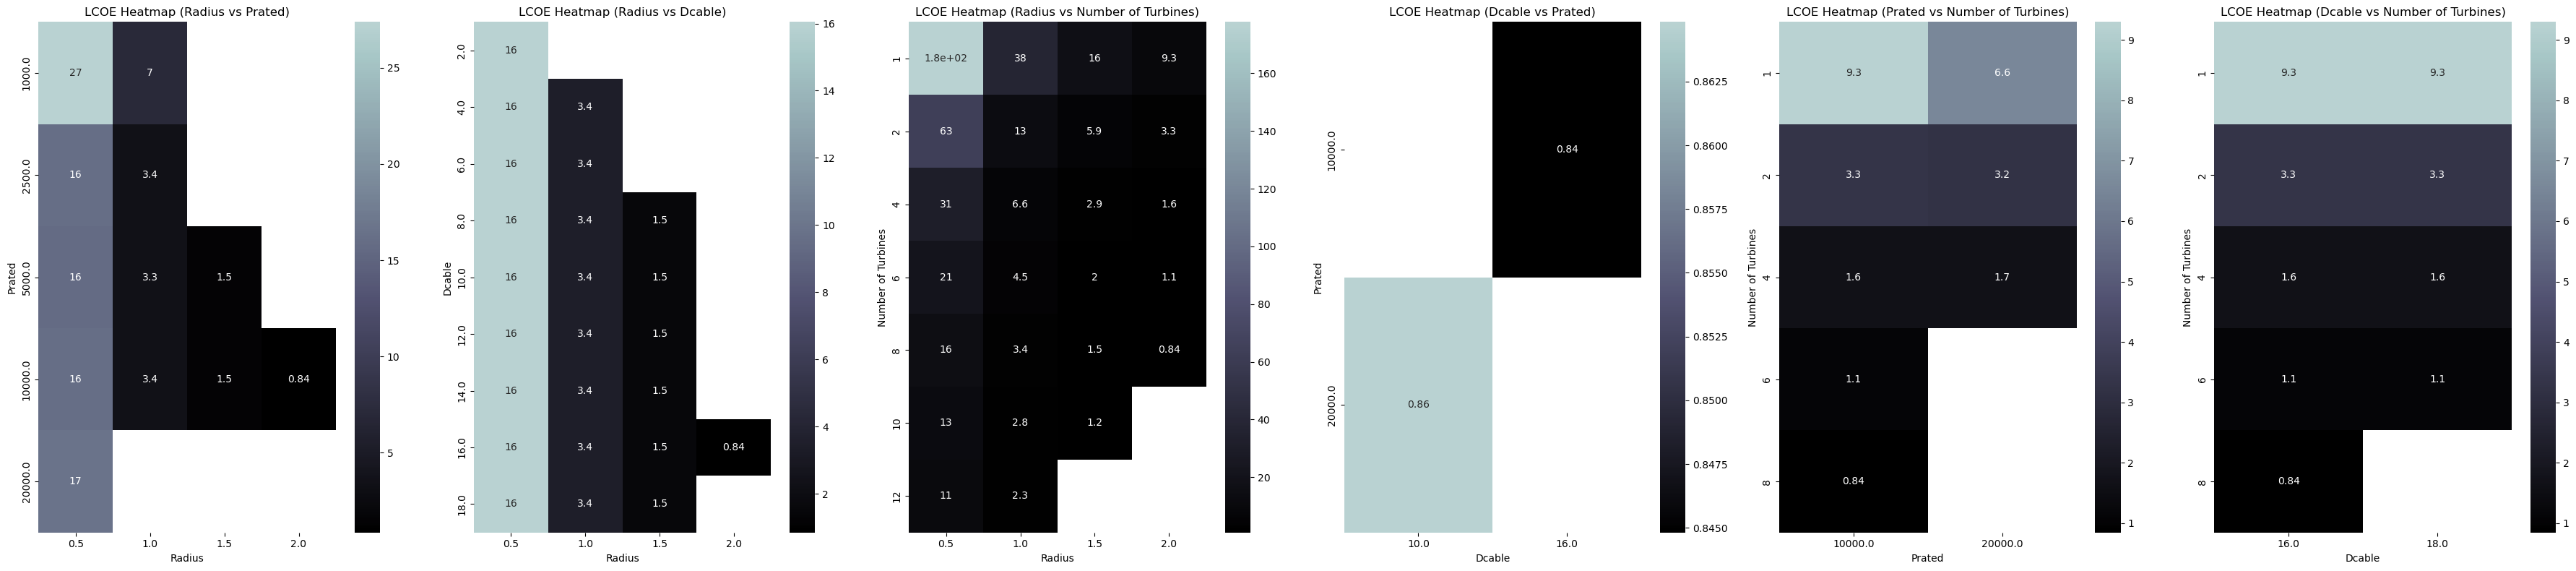

Optimal Radius: 2.0
Optimal Prated: 10000.0
Optimal Dcable: 16.0
Optimal Number of Turbines: 8.0
Minimum LCOE: 0.844814583030551


In [6]:
# Extract the optimal values
min_lcoe = results_df.loc[results_df['lcoe'].idxmin()]
opt_radius = min_lcoe['radius']
opt_prated = min_lcoe['prated']
opt_dcable = min_lcoe['dcable']
opt_number_of_turbines = min_lcoe['number_of_turbines']

# Function to plot heatmap with title
def plot_heatmap(x_range, y_range, values, x_label, y_label, ax, title):
    # Create a custom colormap from the 'bone' colormap, excluding the lightest part
    bone_cmap = plt.get_cmap('bone')
    custom_bone_cmap = mcolors.LinearSegmentedColormap.from_list(
        'custom_bone', bone_cmap(np.linspace(0, 0.8, 256))
    )
    sns.heatmap(values, xticklabels=np.round(x_range, 2), yticklabels=np.round(y_range, 2), cmap=custom_bone_cmap, annot=True, ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f'{title} Heatmap ({x_label} vs {y_label})')

# Create subplots for the six heatmaps
fig, axs = plt.subplots(1, 6, figsize=(36, 8))

# Heatmap with x and y axis as radius and prated
subset_df = results_df[(results_df['dcable'] == opt_dcable) & (results_df['number_of_turbines'] == opt_number_of_turbines)]
pivot_table = subset_df.pivot(index='prated', columns='radius', values='lcoe')
plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Radius', 'Prated', axs[0], 'LCOE')

# Heatmap with x and y axis as radius and dcable
subset_df = results_df[(results_df['prated'] == opt_prated) & (results_df['number_of_turbines'] == opt_number_of_turbines)]
pivot_table = subset_df.pivot(index='dcable', columns='radius', values='lcoe')
plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Radius', 'Dcable', axs[1], 'LCOE')

# Heatmap with x and y axis as radius and number of turbines
subset_df = results_df[(results_df['prated'] == opt_prated) & (results_df['dcable'] == opt_dcable)]
pivot_table = subset_df.pivot(index='number_of_turbines', columns='radius', values='lcoe')
plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Radius', 'Number of Turbines', axs[2], 'LCOE')

# Heatmap with x and y axis as prated and dcable
subset_df = results_df[(results_df['radius'] == opt_radius) & (results_df['number_of_turbines'] == opt_number_of_turbines)]
pivot_table = subset_df.pivot(index='prated', columns='dcable', values='lcoe')
plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Dcable', 'Prated', axs[3], 'LCOE')

# Heatmap with x and y axis as prated and number of turbines
subset_df = results_df[(results_df['radius'] == opt_radius) & (results_df['dcable'] == opt_dcable)]
pivot_table = subset_df.pivot(index='number_of_turbines', columns='prated', values='lcoe')
plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Prated', 'Number of Turbines', axs[4], 'LCOE')

# Heatmap with x and y axis as dcable and number of turbines
subset_df = results_df[(results_df['radius'] == opt_radius) & (results_df['prated'] == opt_prated)]
pivot_table = subset_df.pivot(index='number_of_turbines', columns='dcable', values='lcoe')
plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Dcable', 'Number of Turbines', axs[5], 'LCOE')

plt.tight_layout()
plt.savefig('heatmaps_lcoe_horizontal.png')
plt.show()

# Print the optimal values
print(f"Optimal Radius: {opt_radius}")
print(f"Optimal Prated: {opt_prated}")
print(f"Optimal Dcable: {opt_dcable}")
print(f"Optimal Number of Turbines: {opt_number_of_turbines}")
print(f"Minimum LCOE: {min_lcoe['lcoe']}")


In [7]:
# # Extract the optimal values
# min_lcoe = results_df.loc[results_df['lcoe'].idxmin()]
# opt_radius = min_lcoe['radius']
# opt_prated = min_lcoe['prated']
# opt_dcable = min_lcoe['dcable']
# opt_number_of_turbines = min_lcoe['number_of_turbines']

# # Function to plot heatmap with title
# def plot_heatmap(x_range, y_range, values, x_label, y_label, ax, title):
#     # Create a custom colormap from the 'bone' colormap, excluding the lightest part
#     bone_cmap = plt.get_cmap('bone')
#     custom_bone_cmap = mcolors.LinearSegmentedColormap.from_list(
#         'custom_bone', bone_cmap(np.linspace(0, 0.8, 256))
#     )
#     sns.heatmap(values, xticklabels=np.round(x_range, 2), yticklabels=np.round(y_range, 2), cmap=custom_bone_cmap, annot=True, ax=ax)
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)
#     ax.set_title(f'{title} Heatmap ({x_label} vs {y_label})')

# # Plot individual cost functions in capex list
# capex_columns = capex_df.columns

# # Create subplots for the individual cost functions
# fig, axs = plt.subplots(len(capex_columns), 6, figsize=(36, 5 * len(capex_columns)))

# for i, col in enumerate(capex_columns):
#     # Heatmap with x and y axis as radius and prated
#     subset_df = results_df[(results_df['dcable'] == opt_dcable) & (results_df['number_of_turbines'] == opt_number_of_turbines)]
#     pivot_table = subset_df.pivot(index='prated', columns='radius', values=col)
#     plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Radius', 'Prated', axs[i, 0], col)
    
#     # Heatmap with x and y axis as radius and dcable
#     subset_df = results_df[(results_df['prated'] == opt_prated) & (results_df['number_of_turbines'] == opt_number_of_turbines)]
#     pivot_table = subset_df.pivot(index='dcable', columns='radius', values=col)
#     plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Radius', 'Dcable', axs[i, 1], col)
    
#     # Heatmap with x and y axis as radius and number of turbines
#     subset_df = results_df[(results_df['prated'] == opt_prated) & (results_df['dcable'] == opt_dcable)]
#     pivot_table = subset_df.pivot(index='number_of_turbines', columns='radius', values=col)
#     plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Radius', 'Number of Turbines', axs[i, 2], col)
    
#     # Heatmap with x and y axis as prated and dcable
#     subset_df = results_df[(results_df['radius'] == opt_radius) & (results_df['number_of_turbines'] == opt_number_of_turbines)]
#     pivot_table = subset_df.pivot(index='prated', columns='dcable', values=col)
#     plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Dcable', 'Prated', axs[i, 3], col)
    
#     # Heatmap with x and y axis as prated and number of turbines
#     subset_df = results_df[(results_df['radius'] == opt_radius) & (results_df['dcable'] == opt_dcable)]
#     pivot_table = subset_df.pivot(index='number_of_turbines', columns='prated', values=col)
#     plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Prated', 'Number of Turbines', axs[i, 4], col)
    
#     # Heatmap with x and y axis as dcable and number of turbines
#     subset_df = results_df[(results_df['radius'] == opt_radius) & (results_df['prated'] == opt_prated)]
#     pivot_table = subset_df.pivot(index='number_of_turbines', columns='dcable', values=col)
#     plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, 'Dcable', 'Number of Turbines', axs[i, 5], col)

# plt.tight_layout()
# plt.savefig('heatmaps_cost_extended.png')
# plt.show()


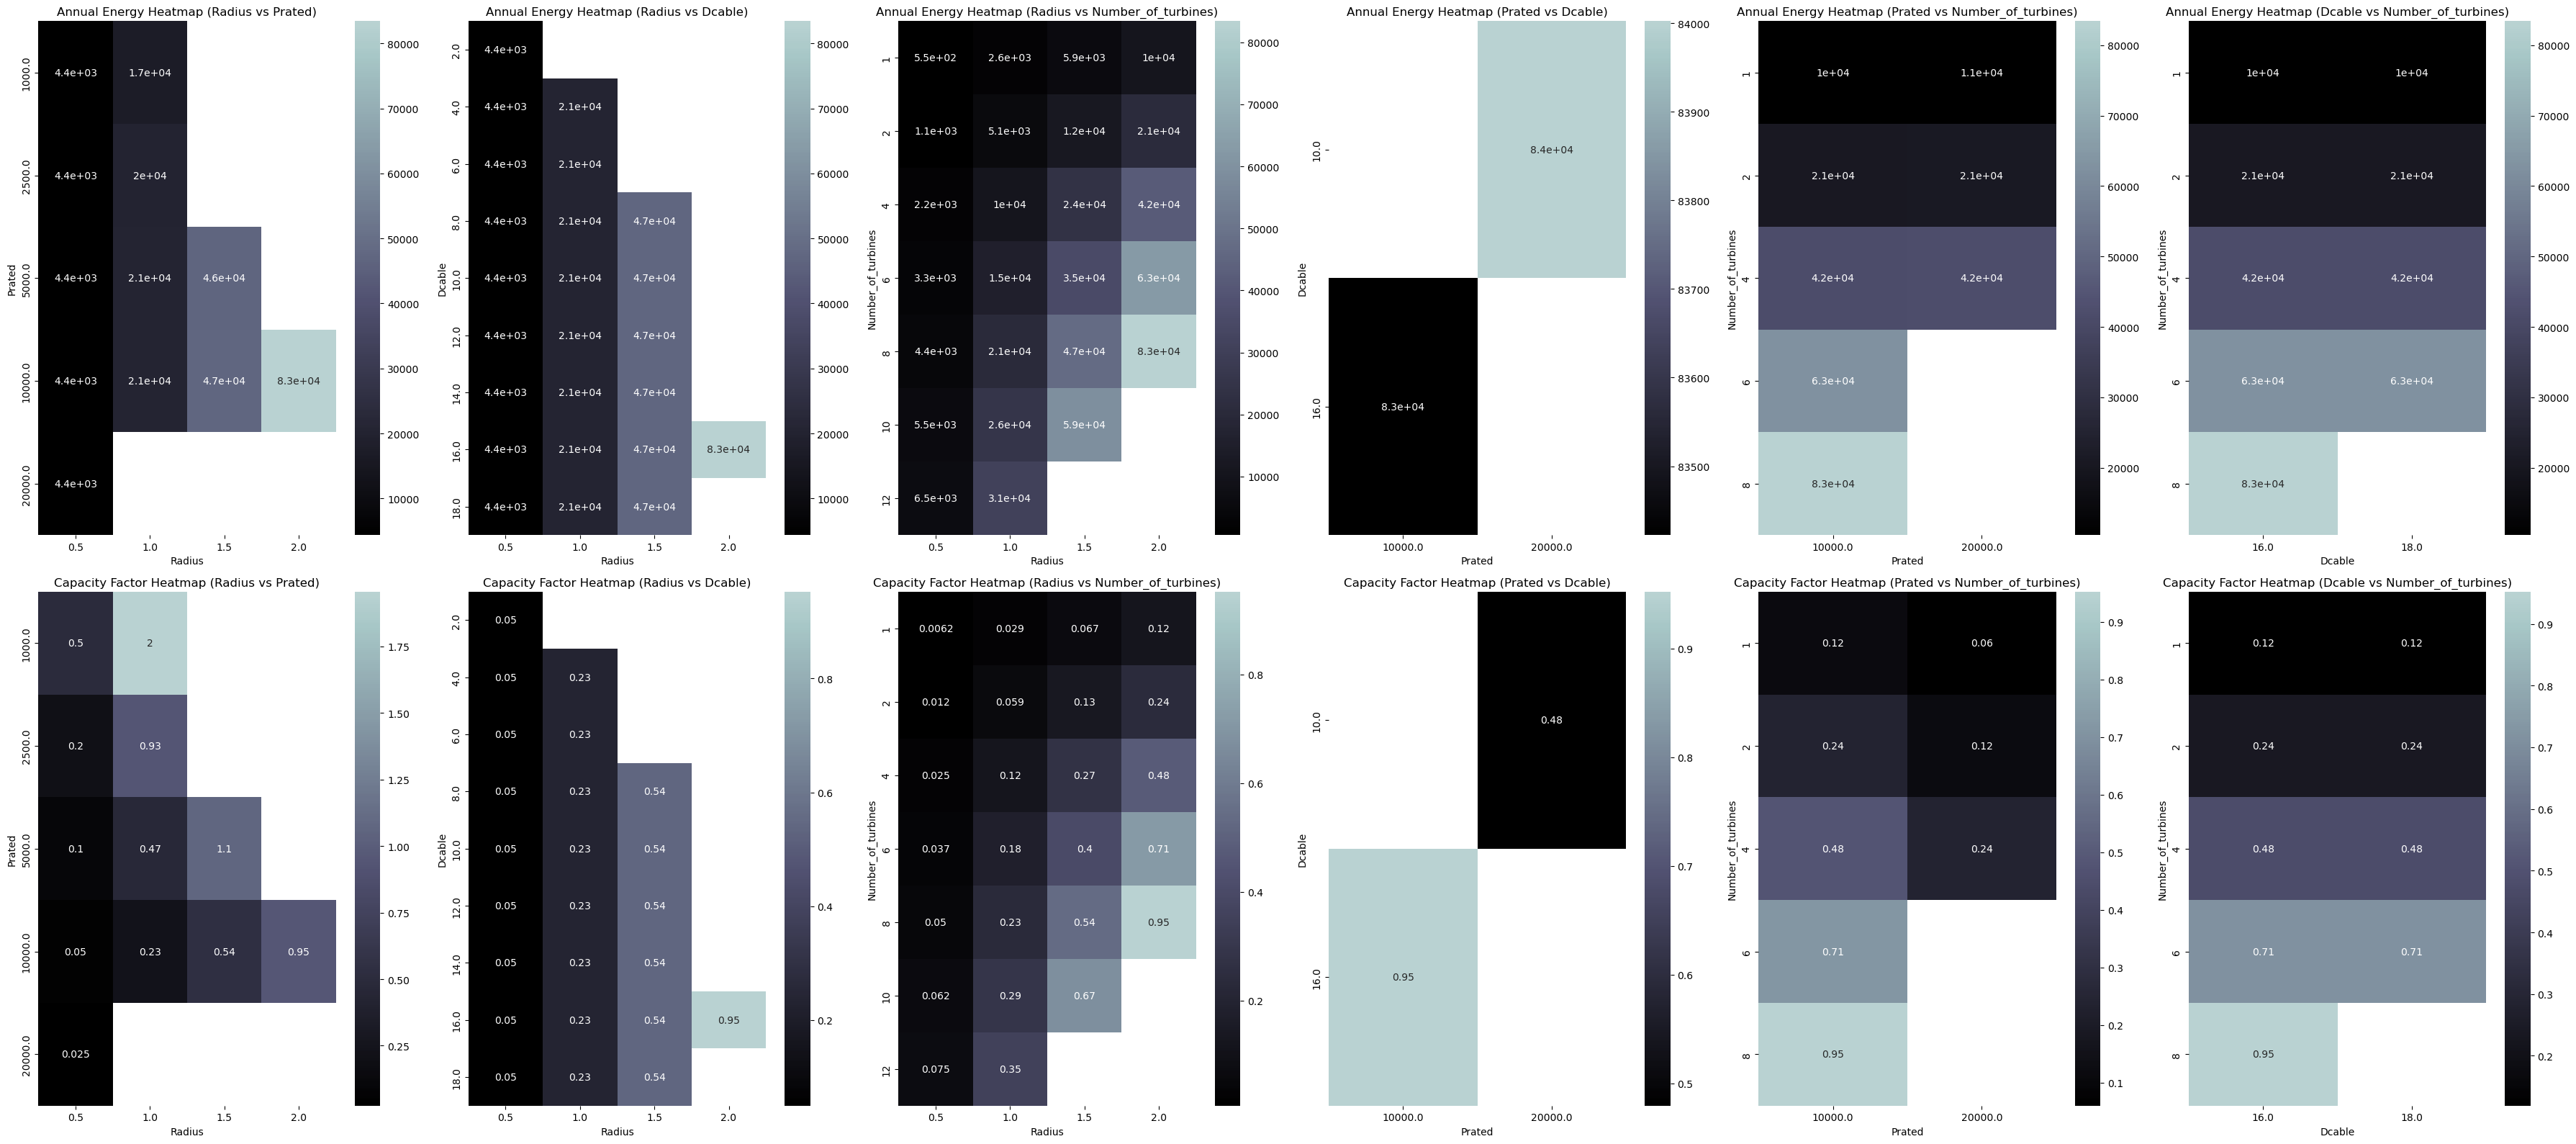

In [8]:
# Extract the optimal values
min_lcoe = results_df.loc[results_df['lcoe'].idxmin()]
opt_radius = min_lcoe['radius']
opt_prated = min_lcoe['prated']
opt_dcable = min_lcoe['dcable']
opt_number_of_turbines = min_lcoe['number_of_turbines']

# Function to plot heatmap with title
def plot_heatmap(x_range, y_range, values, x_label, y_label, ax, title):
    bone_cmap = plt.get_cmap('bone')
    custom_bone_cmap = mcolors.LinearSegmentedColormap.from_list(
        'custom_bone', bone_cmap(np.linspace(0, 0.8, 256))
    )
    sns.heatmap(values, xticklabels=np.round(x_range, 2), yticklabels=np.round(y_range, 2), cmap=custom_bone_cmap, annot=True, ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f'{title} Heatmap ({x_label} vs {y_label})')

# Create subplots for the heatmaps
fig, axs = plt.subplots(2, 6, figsize=(36, 16))

# Define the variable pairs and titles
variable_pairs = [
    ('radius', 'prated', 'Annual Energy'),
    ('radius', 'dcable', 'Annual Energy'),
    ('radius', 'number_of_turbines', 'Annual Energy'),
    ('prated', 'dcable', 'Annual Energy'),
    ('prated', 'number_of_turbines', 'Annual Energy'),
    ('dcable', 'number_of_turbines', 'Annual Energy'),
    ('radius', 'prated', 'Capacity Factor'),
    ('radius', 'dcable', 'Capacity Factor'),
    ('radius', 'number_of_turbines', 'Capacity Factor'),
    ('prated', 'dcable', 'Capacity Factor'),
    ('prated', 'number_of_turbines', 'Capacity Factor'),
    ('dcable', 'number_of_turbines', 'Capacity Factor')
]

# Define the optimal values
optimal_values = {
    'radius': opt_radius,
    'prated': opt_prated,
    'dcable': opt_dcable,
    'number_of_turbines': opt_number_of_turbines
}

# Plot the heatmaps
for i, (x_var, y_var, title) in enumerate(variable_pairs):
    row = i // 6
    col = i % 6
    subset_df = results_df.copy()
    for var in optimal_values:
        if var != x_var and var != y_var:
            subset_df = subset_df[subset_df[var] == optimal_values[var]]
    pivot_table = subset_df.pivot(index=y_var, columns=x_var, values=title.lower().replace(' ', '_'))
    plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, x_var.capitalize(), y_var.capitalize(), axs[row, col], title)

plt.tight_layout()
plt.savefig('heatmaps_annual_energy_capacity_factor.png')
plt.show()


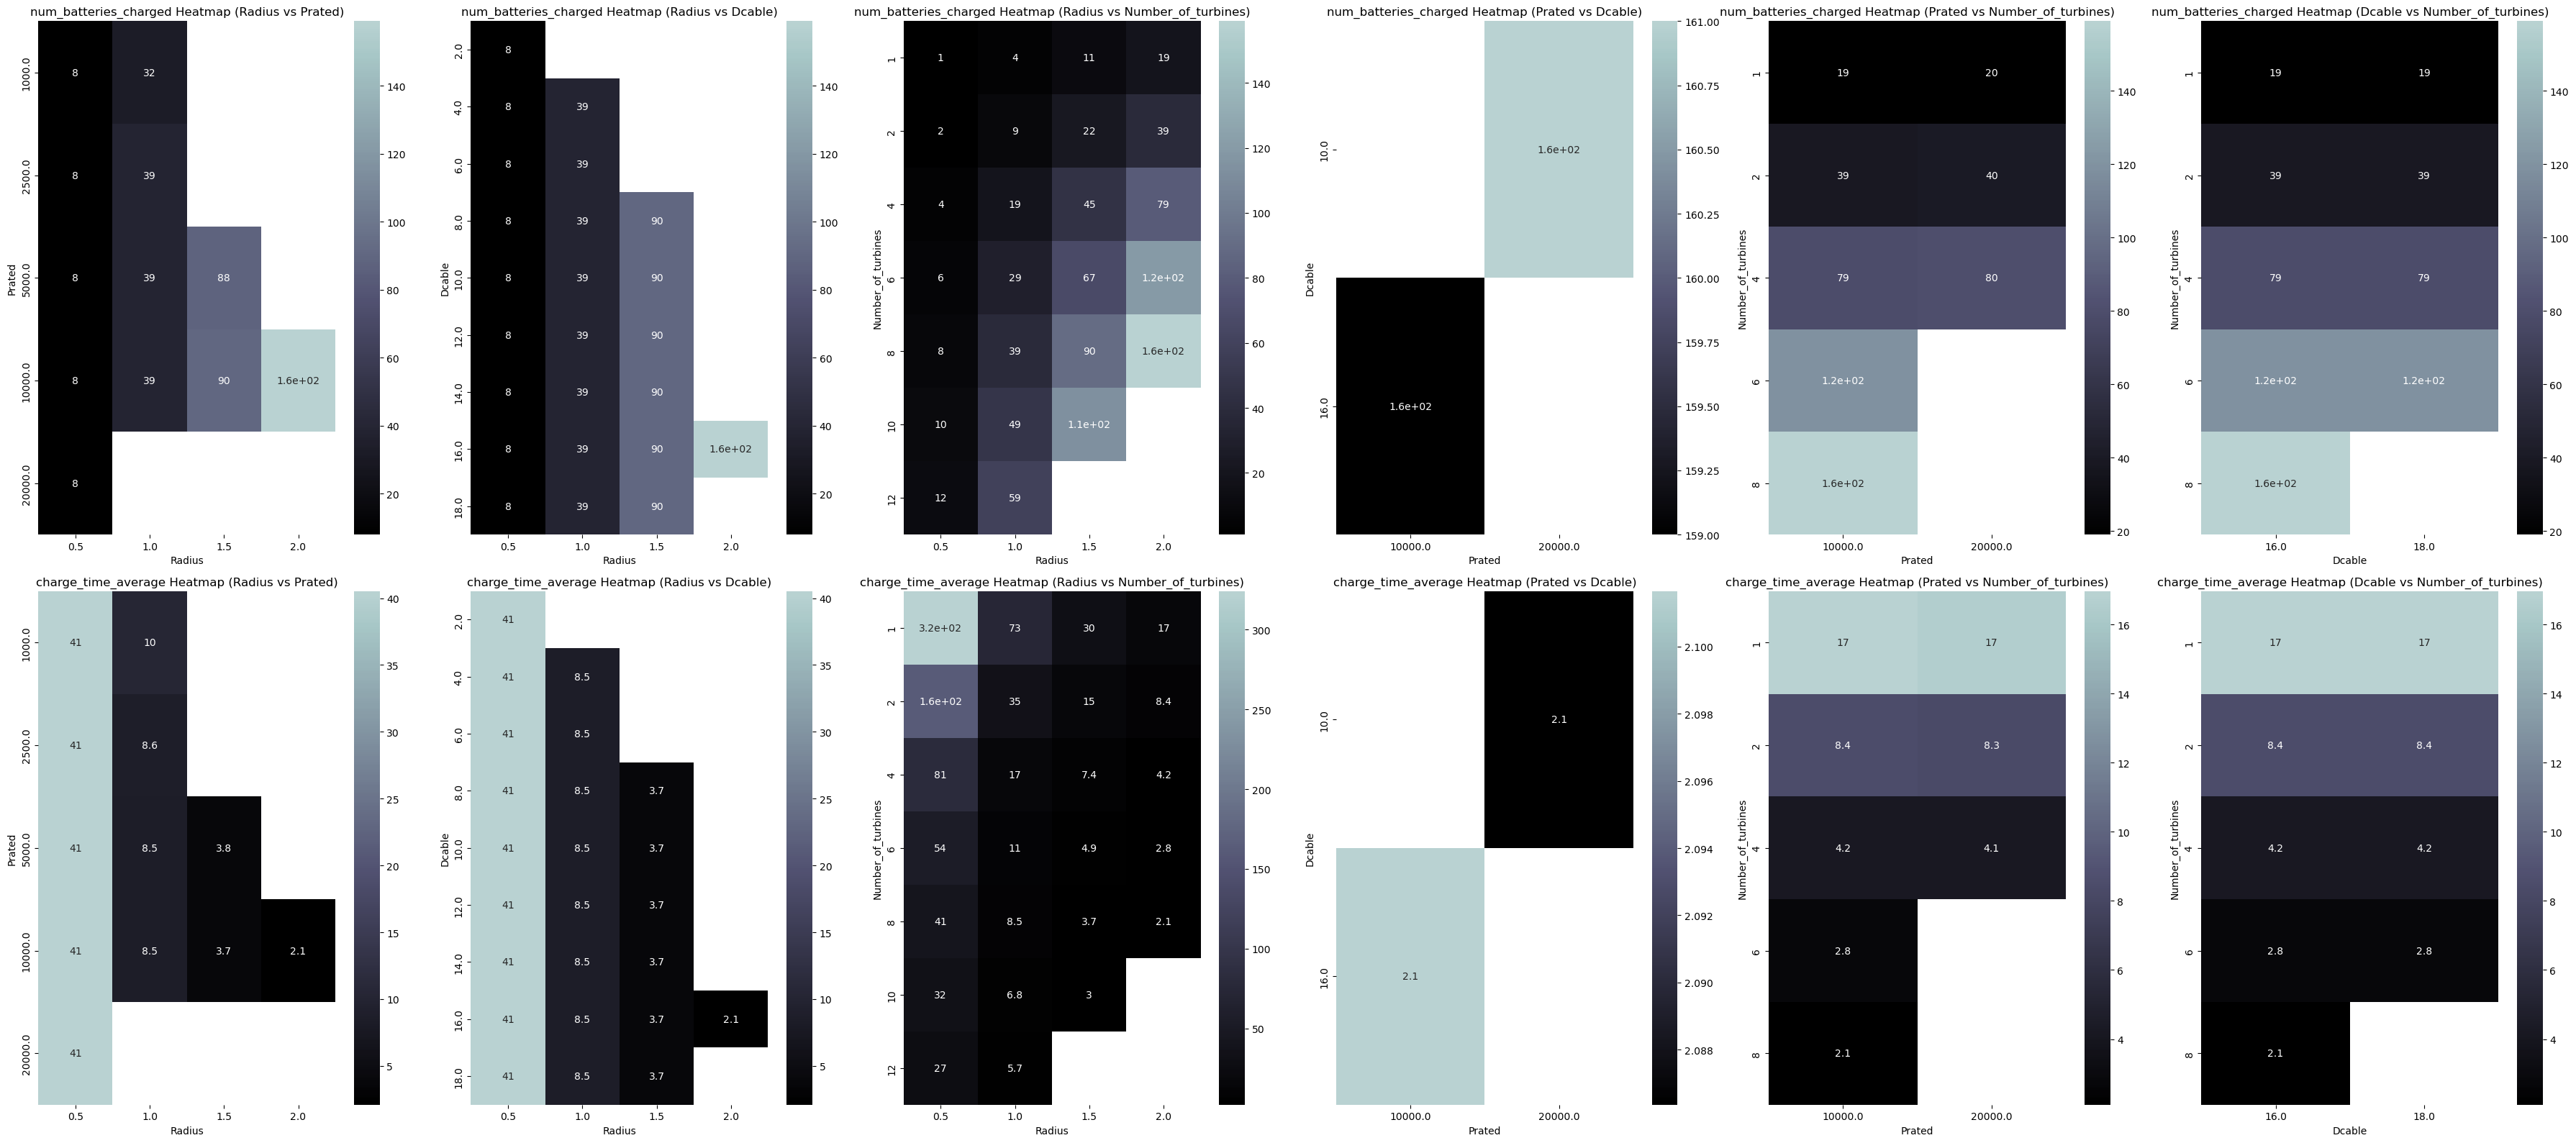

In [9]:
# Extract the optimal values
min_lcoe = results_df.loc[results_df['lcoe'].idxmin()]
opt_radius = min_lcoe['radius']
opt_prated = min_lcoe['prated']
opt_dcable = min_lcoe['dcable']
opt_number_of_turbines = min_lcoe['number_of_turbines']

# Function to plot heatmap with title
def plot_heatmap(x_range, y_range, values, x_label, y_label, ax, title):
    bone_cmap = plt.get_cmap('bone')
    custom_bone_cmap = mcolors.LinearSegmentedColormap.from_list(
        'custom_bone', bone_cmap(np.linspace(0, 0.8, 256))
    )
    sns.heatmap(values, xticklabels=np.round(x_range, 2), yticklabels=np.round(y_range, 2), cmap=custom_bone_cmap, annot=True, ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f'{title} Heatmap ({x_label} vs {y_label})')

# Create subplots for the heatmaps
fig, axs = plt.subplots(2, 6, figsize=(36, 16))

# Define the variable pairs and titles
variable_pairs = [
    ('radius', 'prated', 'num_batteries_charged'),
    ('radius', 'dcable', 'num_batteries_charged'),
    ('radius', 'number_of_turbines', 'num_batteries_charged'),
    ('prated', 'dcable', 'num_batteries_charged'),
    ('prated', 'number_of_turbines', 'num_batteries_charged'),
    ('dcable', 'number_of_turbines', 'num_batteries_charged'),
    ('radius', 'prated', 'charge_time_average'),
    ('radius', 'dcable', 'charge_time_average'),
    ('radius', 'number_of_turbines', 'charge_time_average'),
    ('prated', 'dcable', 'charge_time_average'),
    ('prated', 'number_of_turbines', 'charge_time_average'),
    ('dcable', 'number_of_turbines', 'charge_time_average')
]

# Define the optimal values
optimal_values = {
    'radius': opt_radius,
    'prated': opt_prated,
    'dcable': opt_dcable,
    'number_of_turbines': opt_number_of_turbines
}

# Plot the heatmaps
for i, (x_var, y_var, title) in enumerate(variable_pairs):
    row = i // 6
    col = i % 6
    subset_df = results_df.copy()
    for var in optimal_values:
        if var != x_var and var != y_var:
            subset_df = subset_df[subset_df[var] == optimal_values[var]]
    pivot_table = subset_df.pivot(index=y_var, columns=x_var, values=title.lower())
    plot_heatmap(pivot_table.columns, pivot_table.index, pivot_table.values, x_var.capitalize(), y_var.capitalize(), axs[row, col], title)

plt.tight_layout()
plt.savefig('heatmaps_battery.png')
plt.show()


In [10]:
results_df
results_df.to_excel('results_df.xlsx', index=False)
